In [ ]:
!pip install pycaret

  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 80 kB 9.0 MB/s 
     |████████████████████████████████| 1.3 MB 30.5 MB/s 
     |████████████████████████████████| 56 kB 4.2 MB/s 
     |████████████████████████████████| 636 kB 30.1 MB/s 
     |████████████████████████████████| 102 kB 51.7 MB/s 
     |████████████████████████████████| 675 kB 33.0 MB/s 
     |████████████████████████████████| 62 kB 757 kB/s 
     |████████████████████████████████| 10.1 MB 34.0 MB/s 
     |████████████████████████████████| 3.1 MB 41.3 MB/s 
     |████████████████████████████████| 812 kB 39.3 MB/s 
     |████████████████████████████████| 25.9 MB 986 bytes/s 
     |████████████████████████████████| 1.1 MB 45.1 MB/s 
     |████████████████████████████████| 79 kB 7.1 MB/s 
     |████████████████████████████████| 170 kB 45.7 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 145 kB 45.6 MB/

In [ ]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from pycaret.regression import *
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

import matplotlib.pyplot as plt
import matplotlib

import platform
if platform.system() == 'Windows': 
    matplotlib.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Darwin': # Mac 
    matplotlib.rc('font', family='AppleGothic') 
else:
    matplotlib.rc('font', family='NanumGothic')
matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.style.use('ggplot')

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/bigcon/final_final_train_0913.csv',index_col=0)

In [ ]:
train_df

,base_date,emd_nm,em_g,total_pop,jeju_resd_pop,card_use_amt,delivery_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop
0,2018-01-01,전체,85755000,679922,535888.570169,3.786578e+09,20891720.0,1.602637e+09,108983.0,1057.0,40848.0,32512,7.210523e+06,8.301891e+05,54466.952499,2215.223209
1,2018-01-02,전체,90217650,679922,534509.814556,3.406059e+09,15597155.0,1.286966e+09,107164.0,839.0,38738.0,34664,6.761153e+06,1.368438e+06,53973.690842,2221.350506
2,2018-01-03,전체,80277600,679922,532472.061474,3.499232e+09,13453350.0,1.292679e+09,109765.0,728.0,38284.0,31025,6.770127e+06,1.369782e+06,53705.165769,2172.085577
3,2018-01-04,전체,80138700,679922,514678.201983,3.329829e+09,14592029.0,1.215080e+09,107110.0,740.0,36878.0,31540,6.993326e+06,1.351504e+06,53151.118467,2111.044522
4,2018-01-05,전체,75798600,679922,527383.565802,3.733755e+09,21105231.0,1.290936e+09,112064.0,1009.0,37686.0,29709,6.825653e+06,1.317354e+06,53360.869746,2055.834760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50881,2021-06-30,표선면,1377450,12681,10137.380983,9.063287e+07,1855783.0,3.831039e+07,1336.0,75.0,423.0,370,1.614560e+05,2.405863e+04,914.664667,12.910869
50882,2021-06-30,한경면,973850,9495,7257.895822,4.526361e+07,697661.0,1.767975e+07,1286.0,40.0,423.0,269,1.041218e+05,1.633182e+04,608.427552,22.165953
50883,2021-06-30,한림읍,3298100,24462,20632.727912,1.301568e+08,5508665.0,4.207137e+07,3044.0,257.0,669.0,870,3.018026e+05,5.060204e+04,2064.041876,48.329788
50884,2021-06-30,화북동,3749600,24630,24117.268821,1.918163e+08,13370520.0,4.846083e+07,5644.0,644.0,1645.0,2255,2.433203e+05,5.097469e+04,1810.431884,18.483512


# Summary
- Auto ML을 다룬 데이콘 게시글에서는 대부분 변수를 추가로 만들지 않았기 때문에 feature1에서 feature selection로만 돌려본 다음 파생변수를 추가하여 튜닝한 결과와 비교해 볼 것.
- 데이콘에서 코드에 비해 Boosting, Stacking, Bagging 등의 기법을 추가

# 모델 생성 후 성능 비교

In [ ]:
emd_name = '이도2동'
df = train_df[train_df['emd_nm'] == emd_name].set_index('base_date')
df.drop(columns=['emd_nm'],inplace=True)
scaler = RobustScaler()
# 스케일을 적용할 column을 정의합니다.
y = df[['em_g']].reset_index(drop=True)
scale_cols = df.columns[1:]
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
df = pd.DataFrame(scaled, columns=scale_cols)
df = df.reset_index()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df, y, test_size=0.2, random_state=0, shuffle=False)
train = pd.concat([X_train, y_train], axis = 1)

In [ ]:
clf = setup(data=train,
            target='em_g',
            silent=True,
            fold = 5)

,Description,Value
0,session_id,2227
1,Target,em_g
2,Original Data,"(1021, 15)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(714, 12)"


In [ ]:
best_3 = compare_models(sort = 'RMSE', n_select = 3, fold=5)
print(best_3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,2.782356e+05,1.569324e+11,3.903804e+05,0.8947,0.0582,0.0379,4.208
gbr,Gradient Boosting Regressor,3.132330e+05,1.943525e+11,4.372704e+05,0.8678,0.0640,0.0427,0.182
lightgbm,Light Gradient Boosting Machine,3.212560e+05,2.076384e+11,4.527010e+05,0.8596,0.0652,0.0434,0.188
et,Extra Trees Regressor,3.223967e+05,2.140643e+11,4.578839e+05,0.8556,0.0650,0.0434,0.568
rf,Random Forest Regressor,3.448495e+05,2.400723e+11,4.864237e+05,0.8371,0.0691,0.0465,0.724
llar,Lasso Least Angle Regression,3.975277e+05,2.678782e+11,5.157220e+05,0.8166,0.0726,0.0534,0.020
lasso,Lasso Regression,3.975272e+05,2.678885e+11,5.157313e+05,0.8166,0.0726,0.0534,0.020
lr,Linear Regression,3.975270e+05,2.678891e+11,5.157318e+05,0.8166,0.0726,0.0534,0.602
ridge,Ridge Regression,3.982321e+05,2.680702e+11,5.159599e+05,0.8164,0.0725,0.0535,0.016
huber,Huber Regressor,4.380223e+05,3.173289e+11,5.618674e+05,0.7830,0.0775,0.0588,0.028


[<catboost.core.CatBoostRegressor object at 0x7f400c7cd1d0>, GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=2227, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False), LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, 

# 모델 튜닝 후 성능 비교

In [ ]:
tuned_models = []

## 1. 단일 모델
catboost / Gradient Boosting / LGBM

In [ ]:
# extra tree
model_01 = create_model('catboost')
model_01 = tune_model(model_01, fold= 5, n_iter = 100, optimize = 'RMSE', 
                      verbose = True, choose_better = True)
tuned_models.append(model_01)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,258108.3528,1.107263e+11,332755.6009,0.9167,0.0410,0.0321
1,230700.3106,9.870029e+10,314166.0285,0.9424,0.0414,0.0301
2,273178.6622,1.281180e+11,357935.7050,0.8955,0.0460,0.0360
3,318676.6563,2.550656e+11,505040.1617,0.8630,0.1005,0.0494
4,304430.5911,1.851872e+11,430333.8540,0.8625,0.0578,0.0406
Mean,277018.9146,1.555595e+11,388046.2700,0.8960,0.0574,0.0376
SD,31637.1219,5.792285e+10,70566.0042,0.0310,0.0224,0.0069


In [ ]:
# catboost
model_02 = create_model('gbr')
model_02 = tune_model(model_02, fold= 5, n_iter = 100, optimize = 'RMSE', verbose = True, choose_better = True)
tuned_models.append(model_02)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,287980.7397,1.334604e+11,365322.2848,0.8996,0.0451,0.0359
1,257348.1476,1.151114e+11,339280.7363,0.9328,0.0447,0.0329
2,307421.1064,1.612465e+11,401555.0609,0.8685,0.0516,0.0405
3,354439.3221,2.743635e+11,523797.1928,0.8526,0.1000,0.0536
4,328675.1837,2.092067e+11,457391.2380,0.8447,0.0635,0.0441
Mean,307172.8999,1.786777e+11,417469.3025,0.8796,0.0610,0.0414
SD,33308.7659,5.740544e+10,66310.4933,0.0326,0.0206,0.0072


In [ ]:
# gbr
model_03 = create_model('lightgbm')
model_03 = tune_model(model_03, fold= 5, n_iter = 100, optimize = 'RMSE', verbose = True, choose_better = True)
tuned_models.append(model_03)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,286516.7417,1.568209e+11,396006.1379,0.8821,0.0493,0.0357
1,277892.9359,1.351575e+11,367637.7862,0.9211,0.0509,0.0369
2,306660.0511,1.898792e+11,435751.2539,0.8452,0.0554,0.0401
3,352816.2507,2.858212e+11,534622.4742,0.8465,0.1022,0.0534
4,327130.7437,1.879053e+11,433480.4745,0.8605,0.0605,0.0440
Mean,310203.3446,1.911168e+11,433499.6253,0.8711,0.0637,0.0420
SD,27276.2505,5.155272e+10,56523.3478,0.0283,0.0196,0.0064


## 2. 앙상블

In [ ]:
prediction_models = []

### 배깅

In [ ]:
bag_01_15 = ensemble_model(model_01, n_estimators = 15, fold=5, optimize = 'RMSE')
prediction_models.append(bag_01_15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,276371.3220,1.311472e+11,362142.4532,0.9014,0.0442,0.0343
1,260609.4268,1.311285e+11,362116.6513,0.9235,0.0465,0.0339
2,303391.4984,1.643563e+11,405408.8248,0.8660,0.0528,0.0403
3,334443.0102,3.019139e+11,549466.9055,0.8378,0.1057,0.0516
4,320298.4177,2.071740e+11,455163.7434,0.8462,0.0630,0.0428
Mean,299022.7350,1.871440e+11,426859.7156,0.8750,0.0624,0.0406
SD,27258.0462,6.382161e+10,70247.8045,0.0327,0.0226,0.0065


In [ ]:
bag_02_15 = ensemble_model(model_02, n_estimators = 15, fold=5, optimize = 'RMSE')
prediction_models.append(bag_02_15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,291952.0182,1.408518e+11,375302.3240,0.8941,0.0463,0.0365
1,244892.3793,1.106309e+11,332612.1649,0.9354,0.0432,0.0311
2,299348.1343,1.623339e+11,402906.8325,0.8676,0.0519,0.0396
3,345057.1956,2.714780e+11,521035.5293,0.8542,0.1005,0.0524
4,329805.6089,2.063693e+11,454278.9248,0.8468,0.0621,0.0441
Mean,302211.0673,1.783328e+11,417227.1551,0.8796,0.0608,0.0408
SD,34629.8308,5.604716e+10,65224.9521,0.0322,0.0209,0.0072


In [ ]:
bag_03_15 = ensemble_model(model_03, n_estimators = 15, fold=5, optimize = 'RMSE')
prediction_models.append(bag_03_15)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,282376.3905,1.428606e+11,377969.0943,0.8926,0.0469,0.0354
1,261928.7390,1.240254e+11,352172.4147,0.9276,0.0476,0.0344
2,297576.2608,1.748052e+11,418097.1082,0.8574,0.0537,0.0393
3,344603.1413,2.844274e+11,533317.3229,0.8472,0.1016,0.0522
4,335695.1730,2.144023e+11,463035.9269,0.8408,0.0646,0.0453
Mean,304435.9409,1.881042e+11,428918.3734,0.8731,0.0629,0.0413
SD,31404.0913,5.709584e+10,64289.9978,0.0326,0.0204,0.0067


### 부스팅

In [ ]:
boo_01 = ensemble_model(model_01, method = 'Boosting', fold=5, optimize = 'RMSE')
prediction_models.append(boo_01)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,279751.6766,1.264038e+11,355533.1618,0.9049,0.0437,0.0348
1,262790.3706,1.242489e+11,352489.5276,0.9275,0.0470,0.0348
2,301851.4021,1.631766e+11,403951.2415,0.8669,0.0519,0.0397
3,333516.0366,2.941370e+11,542343.9980,0.8420,0.1053,0.0517
4,320391.0156,2.022115e+11,449679.3763,0.8498,0.0628,0.0430
Mean,299660.1003,1.820356e+11,420799.4610,0.8782,0.0621,0.0408
SD,25832.2255,6.287075e+10,70451.2928,0.0328,0.0225,0.0063


In [ ]:
boo_02 = ensemble_model(model_02, method = 'Boosting', fold=5, optimize = 'RMSE')
prediction_models.append(boo_02)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,312223.8456,1.521590e+11,390075.6622,0.8856,0.0486,0.0388
1,240981.4625,1.052250e+11,324384.0668,0.9386,0.0421,0.0313
2,302139.1842,1.623783e+11,402961.9042,0.8676,0.0515,0.0397
3,341699.3898,2.506516e+11,500651.1737,0.8654,0.0967,0.0518
4,325510.7849,1.978102e+11,444758.5596,0.8531,0.0627,0.0438
Mean,304510.9334,1.736448e+11,412566.2733,0.8820,0.0603,0.0411
SD,34424.0699,4.854658e+10,58599.4301,0.0301,0.0194,0.0067


In [ ]:
boo_03 = ensemble_model(model_03, method = 'Boosting', fold=5, optimize = 'RMSE')
prediction_models.append(boo_03)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,292459.6997,1.370249e+11,370168.7329,0.8969,0.0457,0.0365
1,253475.0554,1.136299e+11,337090.3533,0.9337,0.0439,0.0331
2,306869.7518,1.785117e+11,422506.4970,0.8544,0.0539,0.0405
3,344892.8359,2.900527e+11,538565.4472,0.8442,0.1039,0.0529
4,331851.8410,1.999792e+11,447190.3853,0.8515,0.0605,0.0440
Mean,305909.8368,1.838397e+11,423104.2831,0.8762,0.0616,0.0414
SD,32012.1718,6.114102e+10,69444.0014,0.0342,0.0220,0.0068


### 스태킹

In [ ]:
stactking = stack_models(estimator_list=[model_01, model_02, model_03],  
                         meta_model = model_02, fold=5, optimize='RMSE')
prediction_models.append(stactking)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,280235.2220,1.321729e+11,363555.9039,0.9006,0.0458,0.0354
1,263128.9188,1.369748e+11,370101.0600,0.9201,0.0537,0.0356
2,274306.5705,1.299725e+11,360516.9942,0.8940,0.0464,0.0363
3,353464.8691,2.638925e+11,513704.7294,0.8583,0.0954,0.0525
4,344286.8155,2.279950e+11,477488.1737,0.8307,0.0709,0.0469
Mean,303084.4791,1.782015e+11,417073.3722,0.8807,0.0625,0.0413
SD,37901.2390,5.650956e+10,65202.3141,0.0320,0.0188,0.0071


### 블렌딩

In [ ]:
blended = blend_models(estimator_list = best_3, fold = 5)
prediction_models.append(blended)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,266655.7152,1.236710e+11,351668.8456,0.9070,0.0432,0.0333
1,252203.9604,1.137174e+11,337220.1372,0.9336,0.0431,0.0328
2,292255.8048,1.674774e+11,409240.0704,0.8634,0.0521,0.0385
3,316069.6835,2.583469e+11,508278.3560,0.8612,0.1015,0.0494
4,308524.1996,1.844868e+11,429519.2159,0.8630,0.0587,0.0412
Mean,287141.8727,1.695399e+11,407185.3250,0.8857,0.0597,0.0390
SD,24333.1659,5.164194e+10,61155.5927,0.0295,0.0217,0.0060


## 3. 모델 튜닝 결과

In [ ]:
for model in tuned_models:
    print(model.__class__.__name__)
    display(predict_model(model))

CatBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,276547.1585,1.530394e+11,391202.4714,0.8983,0.0646,0.0387


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.024228e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.865606e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.256347e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.624500e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.414015e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.645834e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.170752e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.858279e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.699229e+06


GradientBoostingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,285842.8394,1.489567e+11,385949.0457,0.9011,0.0573,0.0383


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.187641e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.741267e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.421395e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.609355e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.351171e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.645997e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.122711e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.811010e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.426220e+06


LGBMRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,283610.2085,1.599262e+11,399907.6957,0.8938,0.0601,0.0385


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.245518e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.565517e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.277131e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.682021e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.642238e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.661120e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.203448e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.561026e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.162602e+06


In [ ]:
for model in prediction_models:
    print(model.__class__.__name__)
    display(predict_model(model))

BaggingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,291363.9118,1.734955e+11,416527.9406,0.8848,0.0678,0.041


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.242767e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.804703e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.275279e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.714588e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.619618e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.956469e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.203207e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.818609e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.762956e+06


BaggingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,284776.9007,1.551952e+11,393948.1583,0.8969,0.0599,0.0384


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.288180e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.718144e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.415506e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.628384e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.640327e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.844755e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.220280e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.877325e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.622388e+06


BaggingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,295338.4707,1.668110e+11,408424.9841,0.8892,0.0632,0.0405


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.326139e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.657994e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.320539e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.786413e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.634722e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.844764e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.277928e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.912452e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.265095e+06


AdaBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,289185.4246,1.724670e+11,415291.4059,0.8854,0.0689,0.0408


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.185272e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.846576e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.363720e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.634483e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.495248e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.819588e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.235673e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.782105e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.646266e+06


AdaBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,285368.0361,1.471955e+11,383660.6839,0.9022,0.0556,0.0382


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.094036e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.985707e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.435186e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.631031e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.581495e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.692111e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.235556e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.822785e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.428725e+06


AdaBoostRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,289670.3279,1.641899e+11,405203.5726,0.8909,0.065,0.0404


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.333409e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.792439e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.311839e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.745707e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.633228e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.722528e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.352585e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.663444e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.225270e+06


StackingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,288720.128,1.573423e+11,396663.92,0.8955,0.0636,0.0399


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,6.975343e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.893437e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.258542e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.295039e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.240762e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.388716e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.060573e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.748750e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.798888e+06


VotingRegressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,283263.8774,1.543398e+11,392861.0228,0.8975,0.0632,0.0392


,total_pop,jeju_resd_pop,card_use_amt,market_amt,card_use_cnt,delivery_cnt,market_cnt,em_cnt,visit_pop,work_pop,youth_pop,total_frgn_pop,em_g,Label
0,0.104575,-0.059283,-0.012436,-0.321508,0.702331,0.722302,-0.172222,0.599004,0.105514,-0.126577,-0.599643,-0.596627,6839200.0,7.306022e+06
1,0.212418,-0.622019,-0.326131,-0.601104,0.003586,0.187050,-0.755556,0.247821,0.123781,-0.022527,-0.903372,-0.169106,8294850.0,7.779229e+06
2,0.000000,-0.501448,-0.295580,-0.405801,-0.451285,-0.482014,0.077778,-0.119552,0.800290,0.805790,0.599566,0.056968,7062650.0,7.263067e+06
3,-0.369281,0.017081,0.017972,0.440536,0.184100,-0.505036,1.025926,1.567870,0.486480,0.610070,0.626721,1.157367,9110700.0,9.716867e+06
4,-0.627451,-0.033561,-0.915122,0.094696,-1.092050,-0.446043,0.100000,-0.814446,-0.130370,0.825569,0.367890,0.283016,6627200.0,6.567341e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,0.104575,-0.216016,2.094332,1.555348,2.473999,1.083453,1.927778,0.075965,-0.377701,-0.724655,-1.113894,-0.801077,6715000.0,6.642224e+06
303,-0.800654,-0.061664,0.065913,0.031582,0.087268,-0.365468,0.205556,-0.408468,1.043998,0.495410,0.501611,0.101586,6939650.0,7.269687e+06
304,0.382353,0.482409,0.722837,0.312153,1.114764,0.634532,0.505556,-0.560399,0.279753,-0.564989,-0.127314,-0.450731,6685300.0,6.750167e+06
305,0.222222,-0.695455,1.987547,2.042686,0.381949,0.030216,0.079630,-1.099626,1.698704,-0.002501,-0.410722,0.239756,6365350.0,6.289203e+06


In [ ]:
final_01 = finalize_model(model_02)
final_02 = finalize_model(boo_02)
final_03  = finalize_model(blended)

# 최종모델 결정 및 성능 평가

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import mean_squared_error

value_list = [] # test 용 복사
for model in [final_01, final_02, final_03]:
    prediction_i = predict_model(model, data = X_val)
    y_pred_i = prediction_i['Label']
    
    value_list.append(y_pred_i)
    
    y = y_val
    aucscore = mean_squared_error(y, y_pred_i,squared=False)
    print("RMSE: {}".format(aucscore))

RMSE: 690563.4840311834
RMSE: 717852.0460642979
RMSE: 713611.4770419522


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


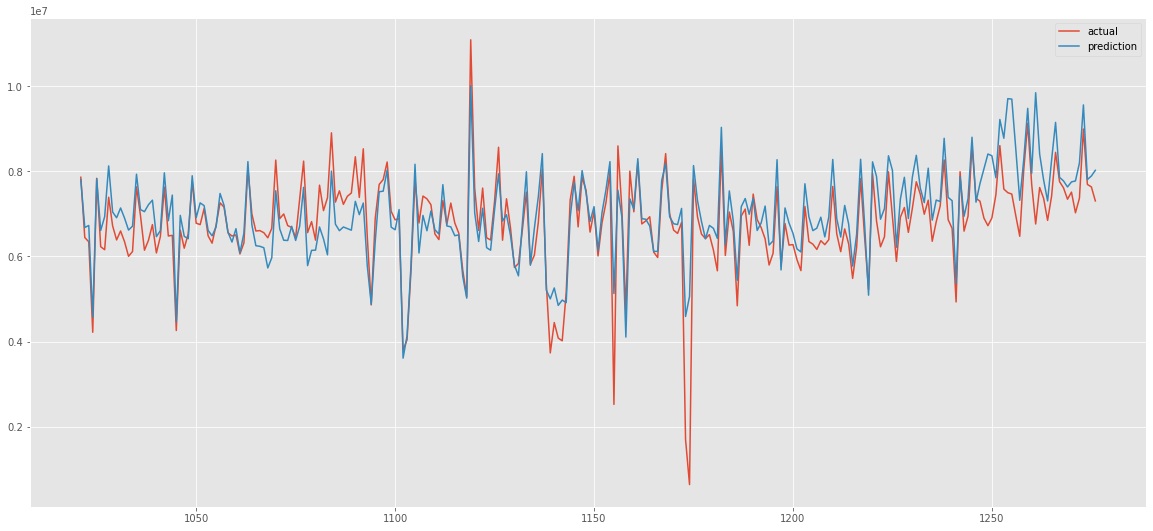

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(y_val, label='actual')
plt.plot(predict_model(final_01, data = X_val)['Label'], label='prediction')
plt.legend()
plt.show()

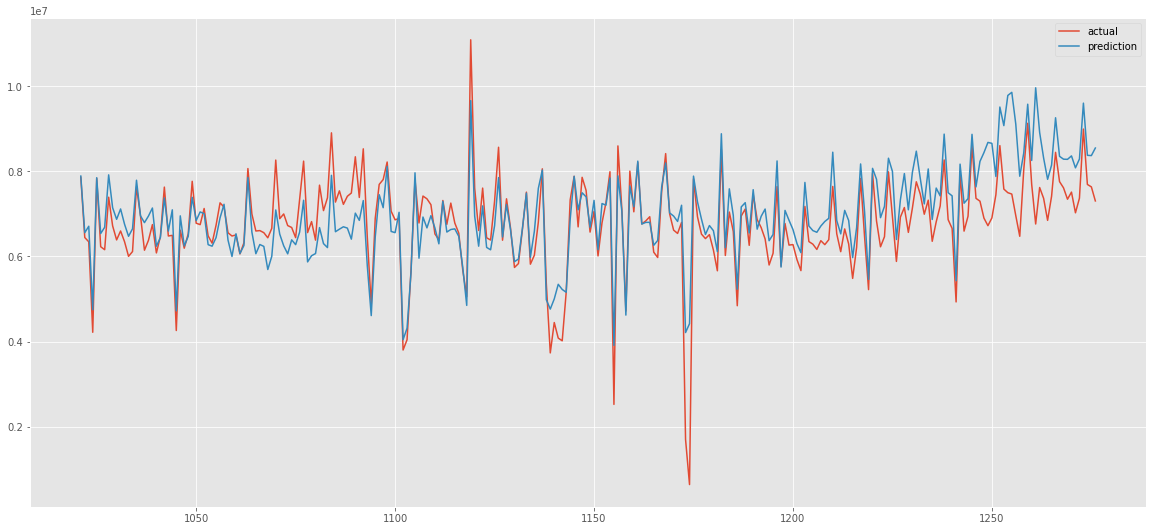

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(y_val, label='actual')
plt.plot(predict_model(final_02, data = X_val)['Label'], label='prediction')
plt.legend()
plt.show()

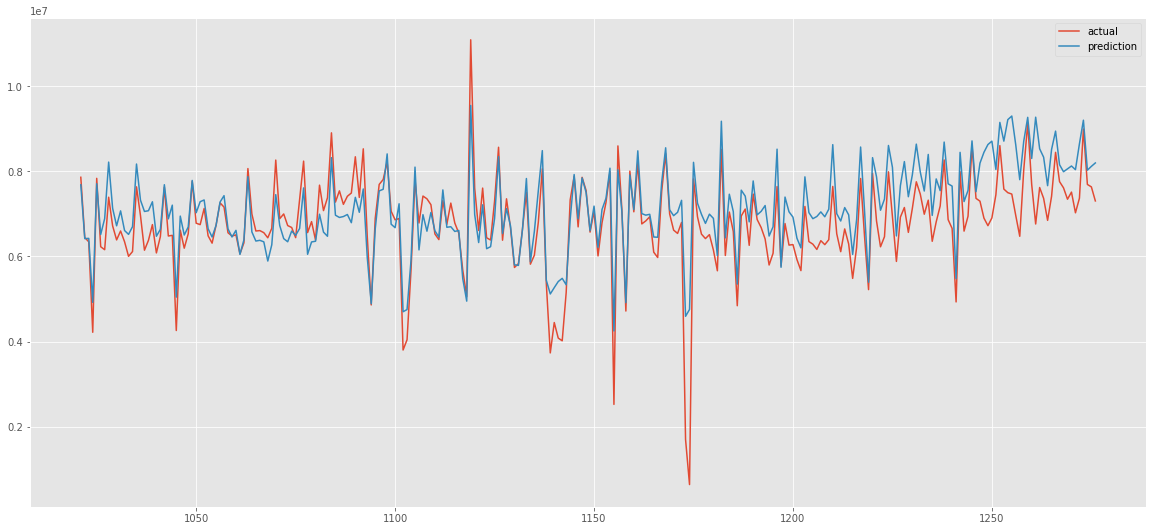

In [ ]:
plt.figure(figsize=(20, 9))
plt.plot(y_val, label='actual')
plt.plot(predict_model(final_03, data = X_val)['Label'], label='prediction')
plt.legend()
plt.show()

In [ ]:
save_model(final_03, '/content/drive/MyDrive/bigcon/emd_model/'+emd_name+'_final_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=['index'],
                                       ml_usecase='regression',
                                       numerical_features=[], target='em_g',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                                                             colsample_bytree=1.0,
                                                             importance_type='split',
                                                             learning_rate=0.1,
                         